# 01: Project Wrangling/EDA

## Data Loading & Overview

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/home/hanyan/dev/DS3001_project/DATA/sleep_cycle_productivity.csv'
df = pd.read_csv(file_path)

df.info()   # Display basic info

df.head()   # Display the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


## Summary Statistics

In [3]:
df.describe()   # Generate summary statistics

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


## Data Cleaning

In [4]:
df.isnull().sum()   # Check for missing values

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

## Visualizations

### Distribution of Sleep Hours

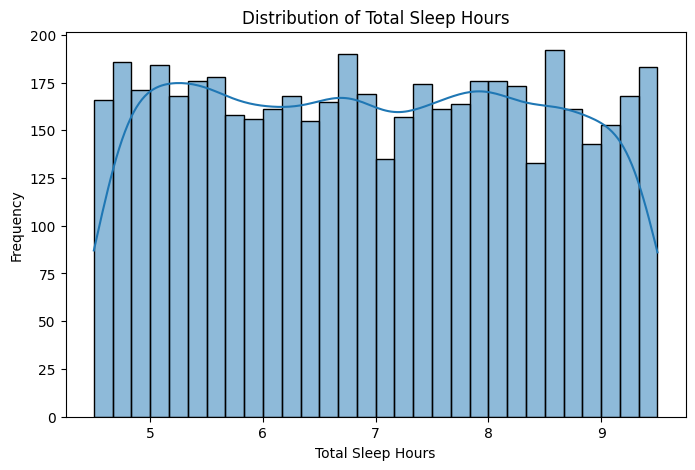

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total Sleep Hours'], bins=30, kde=True)
plt.title('Distribution of Total Sleep Hours')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Frequency')
plt.show()

### Relationship between Sleep and Productivity

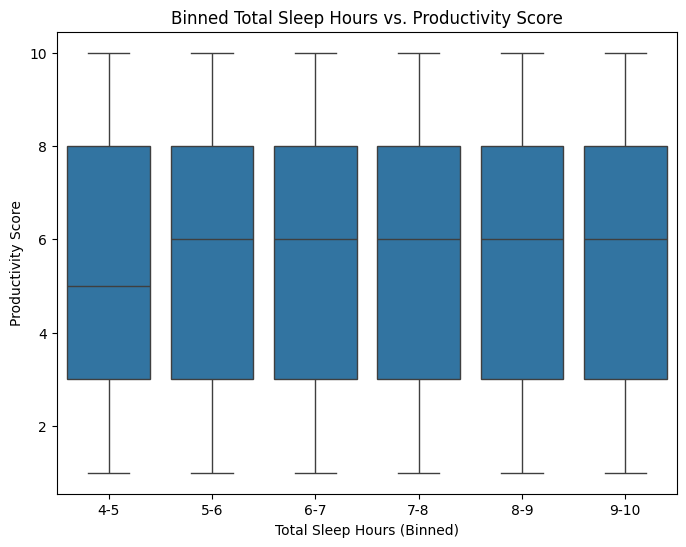

In [6]:
df["Sleep Hours Binned"] = pd.cut(df["Total Sleep Hours"], bins=[4, 5, 6, 7, 8, 9, 10], 
                            labels=["4-5", "5-6", "6-7", "7-8", "8-9", "9-10"])   # Bin sleep hours into categories

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Sleep Hours Binned"], y=df["Productivity Score"], hue=None)

plt.title("Binned Total Sleep Hours vs. Productivity Score")
plt.xlabel("Total Sleep Hours (Binned)")
plt.ylabel("Productivity Score")
plt.show()

### Correlation heatmap

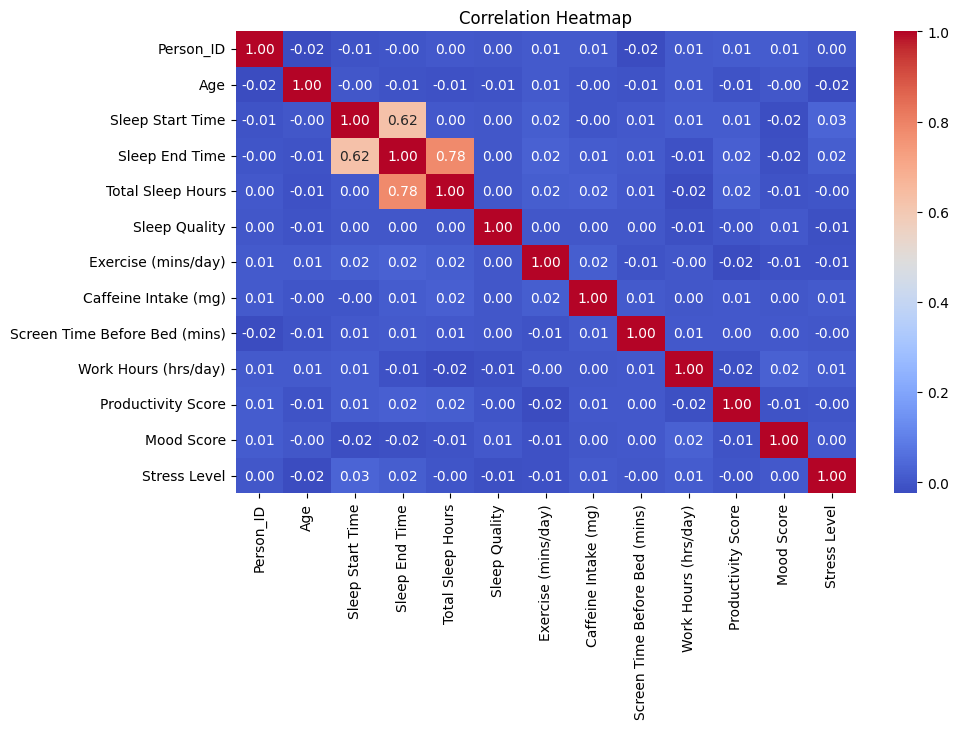

In [7]:

numeric_df = df.select_dtypes(include=["number"])   # Select only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

## Conclusion
- The dataset is clean with no missing values.
- Surprisingly, sleep duration has little potential correlation with productivity.
- Correlation analysis might not be ideal.